#Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#Loading Dataset

In [8]:
pd.set_option('display.max_columns',None)
data=pd.read_csv('/content/drive/MyDrive/DA project/world_population.csv')

In [9]:
#Renaming Columns
column_mapping = {
    'Country/Territory': 'ORIGEN',
    '2022 Population': '2022',
    '2020 Population': '2020',
     '2015 Population': '2015',
    '2010 Population': '2010',
     '2000 Population': '2000',
    '1990 Population': '1990',
     '1980 Population': '1980',
    '1970 Population': '1970',
     'World Population Percentage': 'WP%',
    # Add more mappings as needed
}

# Use the rename function to change the feature names
data.rename(columns=column_mapping, inplace=True)
data

,Rank,CCA3,ORIGEN,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,WP%
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


#Exploratory Data Analysis (EDA)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   CCA3               234 non-null    object 
 2   ORIGEN             234 non-null    object 
 3   Capital            234 non-null    object 
 4   Continent          234 non-null    object 
 5   2022               234 non-null    int64  
 6   2020               234 non-null    int64  
 7   2015               234 non-null    int64  
 8   2010               234 non-null    int64  
 9   2000               234 non-null    int64  
 10  1990               234 non-null    int64  
 11  1980               234 non-null    int64  
 12  1970               234 non-null    int64  
 13  Area (km²)         234 non-null    int64  
 14  Density (per km²)  234 non-null    float64
 15  Growth Rate        234 non-null    float64
 16  WP%                234 non

In [11]:
data.shape

(234, 17)

In [12]:
data.columns

Index(['Rank', 'CCA3', 'ORIGEN', 'Capital', 'Continent', '2022', '2020',
       '2015', '2010', '2000', '1990', '1980', '1970', 'Area (km²)',
       'Density (per km²)', 'Growth Rate', 'WP%'],
      dtype='object')

In [14]:
data.isna().sum()

Rank                 0
CCA3                 0
ORIGEN               0
Capital              0
Continent            0
2022                 0
2020                 0
2015                 0
2010                 0
2000                 0
1990                 0
1980                 0
1970                 0
Area (km²)           0
Density (per km²)    0
Growth Rate          0
WP%                  0
dtype: int64

In [15]:
data.describe()

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,WP%
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


# Data Visualization

In [48]:
population = data.groupby(['ORIGEN','CCA3'])[['2022',
                                                                   '2020',
                                                                   '2015',
                                                                   '2010',
                                                                   '2000',
                                                                   '1990',
                                                                   '1980',
                                                                   '1970']
                                                                 ].value_counts().reset_index()

In [49]:
pop_growth = population.melt(id_vars = ['ORIGEN','CCA3'],
                             value_vars = ['2022',
                                           '2020',
                                           '2015',
                                           '2010',
                                           '2000',
                                           '1990',
                                           '1980',
                                           '1970'],
                            var_name = 'Years')

In [50]:
pop_growth

,ORIGEN,CCA3,Years,value
0,0,AFG,2022,41128771
1,1,ALB,2022,2842321
2,2,DZA,2022,44903225
3,3,ASM,2022,44273
4,4,AND,2022,79824
...,...,...,...,...
1867,229,WLF,1970,9377
1868,230,ESH,1970,76371
1869,231,YEM,1970,6843607
1870,232,ZMB,1970,4281671


In [51]:
#rename column 'value' to 'Population'
pop_growth.rename(columns = {'value':'Population'}, inplace = True)

#split the year from Growth column
pop_growth['Year'] = pop_growth['Years'].str.split(' ').str[0]

#sort Year column
pop_gr = pop_growth.sort_values(by ='Year', ascending = True)

In [52]:
import plotly.express as px

fig = px.choropleth(pop_gr,
                    locations="CCA3",
                    color="Population",
                    hover_name='ORIGEN',
                    animation_frame="Year",
                    animation_group="CCA3",
                    color_continuous_scale="Viridis_r")  # Use a red-based color scale

fig.show()


In [53]:
con_pop = pop_gr.groupby(['ORIGEN','Year']).Population.sum().reset_index()

In [54]:
import plotly.express as px

# Create the animated bar chart
fig = px.bar(
    con_pop,
    x="ORIGEN",
    y="Population",
    color="ORIGEN",
    animation_frame="Year",
    animation_group="ORIGEN",
    range_y=[0, 2000000000],
    range_x=[0,236]
)

# Show the chart
fig.show()


In [55]:
# Create the pie chart
fig = px.pie(con_pop, names="ORIGEN", values="Population", title="Population Distribution by Country/Territory")
# Hide country names and percentages
fig.update_traces(textinfo="none")
fig.show()


In [57]:
fig = px.choropleth(data,
                    locations='CCA3',
                    color='Area (km²)',
                    hover_name='ORIGEN',
                    title='Country area',
                    color_continuous_scale="Viridis_r")
fig.show()


In [60]:

data_sorted = data.sort_values(by='Area (km²)', ascending=False)

# Select the top 10 rows
top_10 = data_sorted.head(10)

fig = px.choropleth(top_10,
                    locations='CCA3',
                    color='Area (km²)',
                    hover_name='ORIGEN',
                    title='Top 10 Countries by Area',
                    color_continuous_scale="Viridis_r")
fig.show()


In [63]:

top_10_growth = data.sort_values(by='Growth Rate', ascending=False).head(10)

fig = px.line(top_10_growth,
             x='ORIGEN',
             y='Growth Rate',
             labels={'ORIGEN': 'Country'},
             title='Top 10 Countries with the Highest Growth Rate',
             markers=True)

# Remove the 'color' parameter to remove color-coding by continent
fig.update_traces(line=dict(color="blue"))  # Set a specific line color for all countries

fig.show()


In [64]:

top_10_growth = data.sort_values(by='Growth Rate', ascending=False).tail(10)

fig = px.line(top_10_growth,
             x='ORIGEN',
             y='Growth Rate',
             labels={'ORIGEN': 'Country'},
             title='10 Countries with the Lowest Growth Rate',
             markers=True)

# Remove the 'color' parameter to remove color-coding by continent
fig.update_traces(line=dict(color="blue"))  # Set a specific line color for all countries

fig.show()


In [65]:
# Assuming you have a DataFrame named 'df' with columns: 'Country/Territory' and 'Growth Rate'

# Sort the DataFrame by 'Growth Rate' in descending order and select the top 10 rows
top_10_population = data.sort_values(by='WP%', ascending=False).head(10)

fig = px.line(top_10_population,
             x='ORIGEN',
             y='WP%',
             labels={'ORIGEN': 'Country'},
             title='Top 10 Countries with the Highest Population',
             markers=True)

# Remove the 'color' parameter to remove color-coding by continent
fig.update_traces(line=dict(color="blue"))  # Set a specific line color for all countries

fig.show()


In [67]:
data.corr()

,Rank,ORIGEN,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,WP%
Rank,1.000000,-0.042460,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
ORIGEN,-0.042460,1.000000,-0.044589,-0.044706,-0.044745,-0.044699,-0.045543,-0.045633,-0.044613,-0.043454,-0.051993,0.013591,0.045103,-0.044670
2022,-0.358361,-0.044589,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020,-0.355854,-0.044706,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015,-0.351222,-0.044745,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010,-0.347461,-0.044699,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000,-0.341057,-0.045543,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990,-0.336152,-0.045633,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980,-0.335246,-0.044613,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970,-0.335379,-0.043454,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150


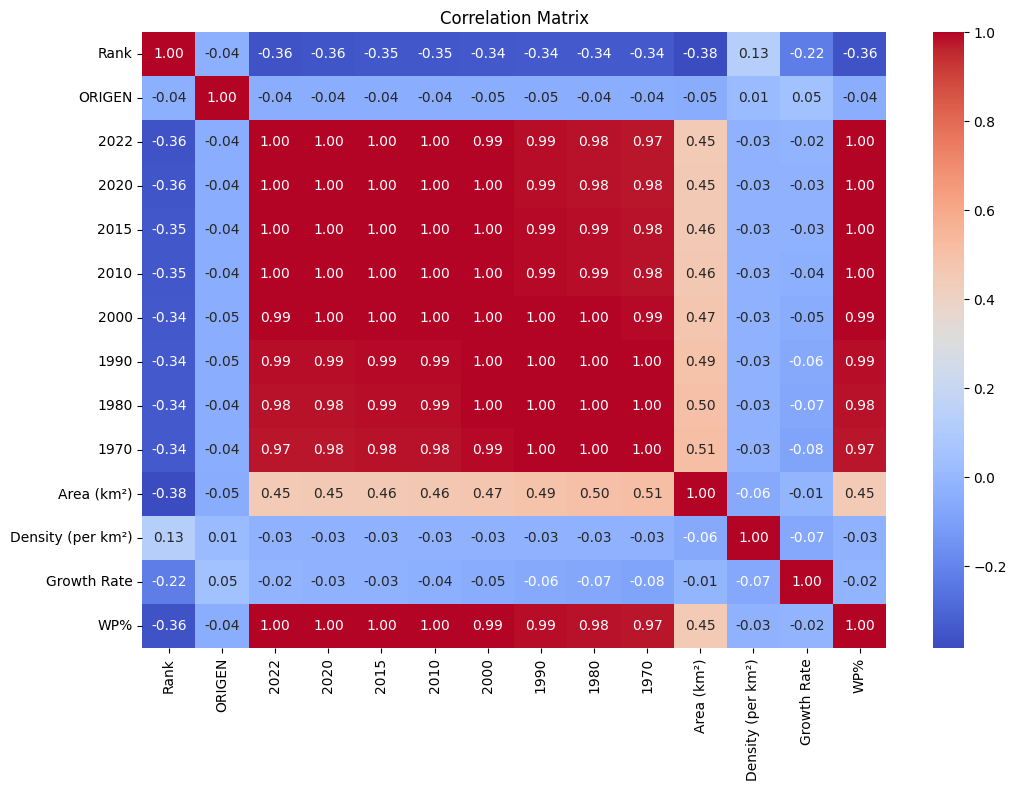

In [68]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#Label Encoding

In [69]:
data.head()

,Rank,CCA3,ORIGEN,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,WP%
0,36,AFG,0,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,1,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,2,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,3,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,4,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [70]:
#importing sklearn libray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
label_encoder = LabelEncoder()
data['ORIGEN'] = label_encoder.fit_transform(data['ORIGEN'])

#Feature Selection

In [72]:
features = data[['ORIGEN', '2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']]
target_growth_rate = data['Growth Rate']
target_wp_percent = data['WP%']

# Data Scaling

In [73]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#Data Splitting

In [74]:
X_train, X_test, y_train_growth_rate, y_test_growth_rate, y_train_wp_percent, y_test_wp_percent = train_test_split(
    features_scaled, target_growth_rate, target_wp_percent, test_size=0.2, random_state=42
)


# Model Implementation

> Indented block



In [75]:
# Linear Regression
linear_model_growth_rate = LinearRegression()
linear_model_wp_percent = LinearRegression()


In [76]:
# Using a Random Forest Regressor as an example
rf_model_growth_rate = RandomForestRegressor(random_state=42)
rf_model_wp_percent = RandomForestRegressor(random_state=42)

In [77]:
# Gradient Boosting Regressor
gb_model_growth_rate = GradientBoostingRegressor(random_state=42)
gb_model_wp_percent = GradientBoostingRegressor(random_state=42)

In [78]:
# Training the models
linear_model_growth_rate.fit(X_train, y_train_growth_rate)
linear_model_wp_percent.fit(X_train, y_train_wp_percent)

rf_model_growth_rate.fit(X_train, y_train_growth_rate)
rf_model_wp_percent.fit(X_train, y_train_wp_percent)

gb_model_growth_rate.fit(X_train, y_train_growth_rate)
gb_model_wp_percent.fit(X_train, y_train_wp_percent)


GradientBoostingRegressor(random_state=42)

# Predictive System

In [79]:
linear_predictions_growth_rate = linear_model_growth_rate.predict(X_test)
linear_predictions_wp_percent = linear_model_wp_percent.predict(X_test)

rf_predictions_growth_rate = rf_model_growth_rate.predict(X_test)
rf_predictions_wp_percent = rf_model_wp_percent.predict(X_test)

gb_predictions_growth_rate = gb_model_growth_rate.predict(X_test)
gb_predictions_wp_percent = gb_model_wp_percent.predict(X_test)

# Model Evaluation

In [80]:
def evaluate_model(name, true, predicted):
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-squared Score: {r2}\n")

evaluate_model("Linear Regression (Growth Rate)", y_test_growth_rate, linear_predictions_growth_rate)
evaluate_model("Linear Regression (WP%)", y_test_wp_percent, linear_predictions_wp_percent)

evaluate_model("Random Forest (Growth Rate)", y_test_growth_rate, rf_predictions_growth_rate)
evaluate_model("Random Forest (WP%)", y_test_wp_percent, rf_predictions_wp_percent)

evaluate_model("Gradient Boosting (Growth Rate)", y_test_growth_rate, gb_predictions_growth_rate)
evaluate_model("Gradient Boosting (WP%)", y_test_wp_percent, gb_predictions_wp_percent)


Linear Regression (Growth Rate) - Mean Squared Error: 0.00022394618912635868
Linear Regression (Growth Rate) - R-squared Score: -0.4341677021129342

Linear Regression (WP%) - Mean Squared Error: 1.0593192935831028e-05
Linear Regression (WP%) - R-squared Score: 0.9999793900653243

Random Forest (Growth Rate) - Mean Squared Error: 0.0001302819671489368
Random Forest (Growth Rate) - R-squared Score: 0.1656647957187698

Random Forest (WP%) - Mean Squared Error: 0.01601920489361701
Random Forest (WP%) - R-squared Score: 0.9688333094267674

Gradient Boosting (Growth Rate) - Mean Squared Error: 0.00010343718872937506
Gradient Boosting (Growth Rate) - R-squared Score: 0.3375807114568612

Gradient Boosting (WP%) - Mean Squared Error: 0.015702931867478804
Gradient Boosting (WP%) - R-squared Score: 0.9694486448075038



Growth Rate - Mean Squared Error: 0.0001302819671489368
Growth Rate - R-squared Score: 0.1656647957187698
WP% - Mean Squared Error: 0.01601920489361701
WP% - R-squared Score: 0.9688333094267674
